# Estatística Descritiva

## Medidas de dispersão

Na aula passada foi visto que as medidas de tendência central são medidas que procuram caracterizar um conjunto de dados descrevendo, de forma numérica, aonde os dados se concentram. Estas medidas são largamente utilizadas na caracterização dos dados, no entanto, existem situações em que dois conjuntos de dados completamente diferentes possuem o mesmo valor numérico para cada uma das medidas de tendência central.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def mediana (listNum):
    listNum = sorted(listNum)
    lenList = len(listNum)
    if (lenList % 2 == 0):
        mediana = (listNum[int((lenList/2)-1)] + listNum[int(lenList/2)])/2
    else:
        mediana = listNum[int((lenList - 1)/2)]
    return mediana

def moda (listNum):
    valor = {}
    maxCount = 0
    moda = []
    for i in listNum:
        if i not in valor:
            valor[i] = 1
        else:
            valor[i] += 1

        if (maxCount < valor[i]):
            maxCount = valor[i]
            moda = [i]
        elif (maxCount == valor[i]):
            moda.append(i)
    moda = sorted(moda)
    return moda

def medArit (listNum):
    lenList = len(listNum)
    soma = 0
    for i in listNum:
        soma += i
    return soma/lenList


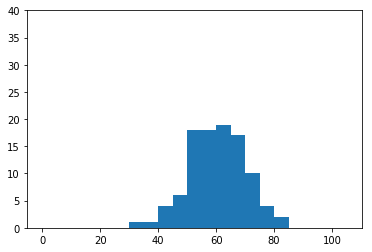

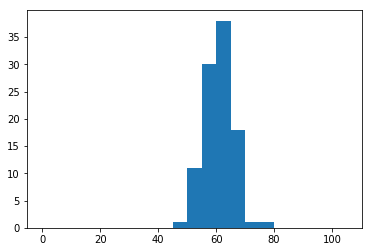

In [2]:
data1= [54,61,60,71,64,49,62,54,62,65,64,31,62,60,47,65,55,58,56,63,70,53,55,64,43,51,74,53,41,58,57,50,74,65,80,79,66,65,46,53,54,62,47,75,70,61,59,44,64,64,65,53,78,70,69,57,55,71,78,51,54,60,50,67,69,69,48,60,41,53,65,53,55,71,56,51,68,59,81,69,55,72,53,66,49,66,55,60,50,37,58,69,58,62,70,51,55,58,60,69]
data2 = [56,64,70,56,58,61,62,67,69,63,59,61,57,60,55,63,60,65,58,61,51,56,67,57,60,68,59,61,62,67,58,60,61,57,63,64,62,62,68,62,63,59,51,58,55,58,46,62,69,67,67,65,50,62,55,66,52,67,55,62,60,75,56,59,67,57,62,60,58,65,52,69,66,65,56,61,56,62,60,54,54,64,61,61,54,57,59,60,60,57,62,52,62,57,51,57,51,62,61,58]
bins = np.arange(0,110,5)
plt.hist(data1, bins)
plt.yticks(np.arange(0,41,5))
plt.show()
plt.hist(data2, bins)
plt.show()

In [3]:
print("Data 1")
print("média aritmética: %.2f" % (medArit(data1)))
print("mediana: %.2f" % (mediana(data1)))
print("moda: %s" % (",".join(str(x) for x in moda(data1))))
print()
print("Data 2")
print("média aritmética: %.2f" % (medArit(data2)))
print("mediana: %.2f" % (mediana(data2)))
print("moda: %s" % (",".join(str(x) for x in moda(data2))))

Data 1
média aritmética: 59.79
mediana: 60.00
moda: 53,55

Data 2
média aritmética: 60.19
mediana: 60.00
moda: 62


### Amplitude entre Quartis (IQR)

Amplitude entre quartis corresponde a diferença entre o Q1 e o Q3. É uma medida de dispersão mais robusta que a amplitude, já que ele descarta da análise os 25% maiores e os 25% menores dados.

#### Exercício 1
Monte uma função que recebe uma lista de números e retorne o IQR. Calcule o IQR dos dados contidos nas variáveis data1 e data2.

In [4]:
def iqr(numList):
    numList = sorted(numList)
    lenList = len(numList)
    if (lenList % 2 == 0):
        minorList = numList[0:int(lenList/2)]
        majorList = numList[int(lenList/2):lenList]
        q1 = mediana(minorList)
        q3 = mediana(majorList)
    else:
        minorList = numList[0:int(lenList/2)]
        majorList = numList[int((lenList/2)+1):lenList]
        q1 = mediana(minorList)
        q3 = mediana(majorList)
    return q3 -q1

print(iqr(data1))


13.0


### Gerando um gráfico boxplot com matplotlib.pyplot
Mais detalhes em:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

https://matplotlib.org/examples/pylab_examples/boxplot_demo.html

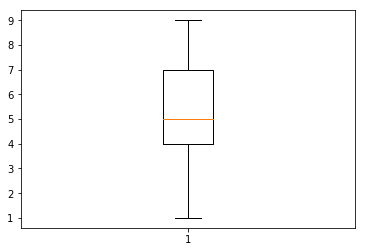

In [5]:
teste = [1,4,4,2,6,7,8,9,5,4,3,6,7,8,8,5,4,4,3]
plt.boxplot(teste)
plt.show()

#### Exercício 2

Plote dois gráficos boxplot dos dados contidos nas variáveis data1 e data2.

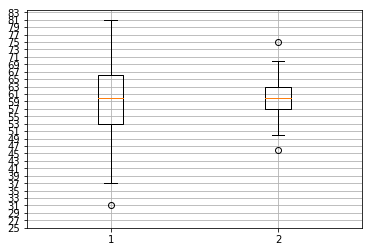

In [6]:
plt.boxplot([data1, data2])
plt.yticks(range(25,85,2))
plt.grid()
plt.show()

### Outliers

O que são os pontos abaixo e acima dos traços da mínima e da máxima que apareceram no boxplot do exercício 2?

Estes pontos, que também fazem parte do conjunto de dados são denominados outliers, que representam aqueles dados extremos, que se encontram distantes do restante dos dados. 

Em muitos boxplots, os traços do mínimo e do máximo não são necessariamente o mínimo e o máximo dos dados. O matplotlib.pyplot, neste caso, calcula a partir dos dados IQR e das posições do valor do Q1 e do Q3 para determinar o limite do boxplot.

Para o limite inferior, utiliza-se a fórmula: Q1 - 1.5 \* IQR

Para o limite superior, utiliza-se a fórmula: Q3 + 1.5 \* IQR

Os traços do mínimo e do máximo, neste caso, representam os primeiros ou os últimos dados que estejam dentro dos limites calculados pelas fórmulas anteriores.

Para dados1, o limite inferior seria: 

Q1 - 1.5 \* IQR = 53 - 1.5 \* 13 = 33.5

O valor mínimo em dados1 é 31 (representado com um ponto), e o primeiro valor no conjunto de dados que é superior a 33.5 é o 37, onde encontramos exatamente o traço do limite inferior.

No caso do limite superior de dados1:

Q3 + 1.5 \* IQR = 66 - 1.5 \* IQR = 85.5

Como o valor máximo em dados1, que é 81, é inferior a 85.5, o limite superior fica no 81.

### Desvio em relação à média

Uma das formas interessantes de descrever os dados de acordo com a dispersão é calculando a diferença entre os pontos e a média. Esta diferença é chamada simplesmente de **desvio**. Uma conta intuitiva seria calcular a média desse desvio.

#### Exercício 3

Calcule a média dos desvios dos conjuntos de dados presentes nas variáveis data1 e data2.

In [7]:
dados1np = np.array(data1)
meanDados1 = medArit(data1)
desvio1 = dados1np - meanDados1
print(medArit(desvio1))

dados2np = np.array(data2)
meanDados2 = medArit(data2)
desvio2 = dados2np - meanDados2
print(medArit(desvio2))

1.2079226507921704e-15
2.2737367544323206e-15


A partir do exercício anterior, logo chegamos a conclusão de que isso não é um procedimento interessante já que a somatória dos desvios é sempre 0 (ou próximo dele).

Então o que podemos fazer para tomar proveito dos valores de desvio?

### Desvio absoluto

Uma das formas de contornar isso é transformando o valor do desvio em números absolutos. Assim, os desvios sempre terão valores positivos, possibilitando que e a média do desvio absoluto seja maior que zero e dependente dos dados.

#### Exercício 4

Calcule a média do desvio absoluto dos conjuntos de valores paresentes em data1 e data2.

In [8]:
dados1np = np.array(data1)
meanDados1 = medArit(data1)
desvioabs1 = abs(dados1np - meanDados1)
print(medArit(desvioabs1))

dados2np = np.array(data2)
meanDados2 = medArit(data2)
desvioabs2 = abs(dados2np - meanDados2)
print(medArit(desvioabs2))

7.738399999999998
3.9737999999999998


### Variância

Uma segunda forma de contornar o problema da somatória dos desvios seria elevando cada um dos desvios ao quadrado. Esta operação também resulta sempre em números positivos, permitindo que a sua média seja maior que zero e dependente de dados. A média dos desvios ao quadrado também é conhecida como variância e é largamente utilizado em diferentes áreas da estatística.

#### Exercício 5

Calcule a média do quadrado do desvio (variância) dos conjuntos de dados em data1 e data2.

In [9]:
dados1np = np.array(data1)
meanDados1 = medArit(data1)
desvioqdr1 = (dados1np - meanDados1)**2
print(medArit(desvioqdr1))

dados2np = np.array(data2)
meanDados2 = medArit(data2)
desvioqdr2 = (dados2np - meanDados2)**2
print(medArit(desvioqdr2))

92.52589999999998
25.7339


### Desvio padrão

Quando lidamos com a variância, estamos lidando com um valor que possui duas dimensões, já que sempre estamos elevando os valores dos desvios ao quadrado. Por isso, em muitos casos é interessante linearizar a variância, e podemos fazer isso calculando a sua raiz quadrada. A raiz quadrada da variância é conhecida como desvio padrão.

#### Exercício 6

Calcule o desvio padrão dos conjuntos de dados em data1 e data2.

In [10]:
dados1np = np.array(data1)
meanDados1 = medArit(data1)
desvioqdr1 = (dados1np - meanDados1)**2
print(medArit(desvioqdr1)**0.5)

dados2np = np.array(data2)
meanDados2 = medArit(data2)
desvioqdr2 = (dados2np - meanDados2)**2
print(medArit(desvioqdr2)**0.5)

9.6190384134798
5.072859154362557


#### Exercício 7

Um treinador de basquete está na dúvida entre três jogadores (A, B, C) para a sua escalação. Tomando nota das últimas pontuações realizadas por cada um destes jogadores, qual o jogador o treinador deveria escalar? Considere os números de pontos e a consistência dos jogadores como critérios importantes para a escolha. 

In [11]:
A = [25,24,24,24,28,26,27,26,22,18,30,24,21,20]
B = [36,21,33,20,34,28,23,34,28,28,23,26,11,28]
C = [25,25,23,24,25,24,25,25,24,24,24,24,24,24]

dadosA = np.array(A)
dadosB = np.array(B)
dadosC = np.array(C)
print("jogador A: média %.3f; sd %.3f" % (dadosA.mean(), dadosA.std()))
print("jogador B média %.3f; sd %.3f" % (dadosB.mean(), dadosB.std()))
print("jogador C: média %.3f; sd %.3f" % (dadosC.mean(), dadosC.std()))

jogador A: média 24.214; sd 3.098
jogador B média 26.643; sd 6.498
jogador C: média 24.286; sd 0.589


#### Exercício 8

Um estudante tirou notas cujo desvio padrão é zero. O que podemos dizer sobre as notas deste estudante?


*Resposta*: O aluno tirou as mesmas notas em todas as provas realizadas.

O desvio padrão é uma medida de dispersão muito utilizada na estatística por apresentar algumas propriedades interessantes. Em dados que possuem uma distribuição normal, foi verificado que aproximadamente 68% dos dados estão no intervalo entre (média - desvio padrão) e (média + desvio padrão). Além disso, verificou-se que aproximadamente 95% dos dados encontram-se no intervalo entre (média - 2\*desvio padrão) e (média + 2\*desvio padrão).

#### Exercício 9

Após uma prova de vestibular feita por 500 candidatos, observou-se que as notas possuem uma distribuição normal e que a média das notas foi 60 e o seu desvio padrão 15. Supondo que há apenas 50 vagas, o que se pode dizer de um aluno que tirou 75?

*Resposta*: Uma nota 75 corresponde a soma da média e um desvio padrão. Portanto, ele deve estar acima de aproximadamente 84% dos candidatos, o que corresponderia a 420 candidatos. Como o número de vaga é limitada para 50, pode ser muito provável que o referido candidato não tenha conhecido a vaga.